In [192]:
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
df_supermarket = pd.read_json('supermarket.json')

In [181]:
print(df_supermarket.head)

<bound method NDFrame.head of                                                lojas
0  {'id': 1, 'dados_mensais': [{'mes': 1, 'fatura...
1  {'id': 2, 'dados_mensais': [{'mes': 1, 'fatura...
2  {'id': 3, 'dados_mensais': [{'mes': 1, 'fatura...
3  {'id': 4, 'dados_mensais': [{'mes': 1, 'fatura...
4  {'id': 5, 'dados_mensais': [{'mes': 1, 'fatura...>


In [182]:
def extrair_dados_loja_mes(loja_id,mes):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    return dados_mensais
    return None

extrair_dados_loja_mes(5,12) 

{'mes': 12,
 'faturamento': {'higiene_e_saude': 13600,
  'limpeza': 19900,
  'bebidas': 8100,
  'carne_e_laticinios': 4900,
  'alimentacao': 5100},
 'gastos_funcionarios': 32000,
 'despesas_fornecedores': 27000,
 'gastos_diversos': 10500}

In [183]:
def faturamento_loja_mes(loja_id,mes):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    for faturamento in dados_mensais['faturamento']:   
                        faturamento  = sum(dados_mensais['faturamento'].values())
                    return faturamento
    return None

extrair_dados_loja_mes(1,1) 

{'mes': 1,
 'faturamento': {'higiene_e_saude': 15200,
  'limpeza': 19800,
  'bebidas': 8600,
  'carne_e_laticinios': 4900,
  'alimentacao': 5300},
 'gastos_funcionarios': 20000,
 'despesas_fornecedores': 15000,
 'gastos_diversos': 5000}

In [184]:
def faturamento_loja_ano(loja_id):
    faturamento_anual =0
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                faturamento_anual += sum(dados_mensais['faturamento'].values())
            return faturamento_anual
    return None

faturamento_loja_ano(1) 

644800

In [185]:
def gastos_dados_loja_mes(loja_id, mes):
    for loja in df_supermarket["lojas"]:
        if loja["id"] == loja_id:
            for dados_mensais in loja["dados_mensais"]:
                if dados_mensais["mes"] == mes:
                    gastos = dados_mensais["gastos_funcionarios"]+dados_mensais["gastos_diversos"]           
        return gastos
    return None


gastos_dados_loja_mes(1, 1)

25000

In [186]:

def extrair_lucro_loja_mes(loja_id, mes):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    for faturamento in dados_mensais['faturamento']:
                        faturamento = sum(dados_mensais['faturamento'].values())
                        gastos = dados_mensais['gastos_funcionarios'] + dados_mensais['despesas_fornecedores'] + dados_mensais['gastos_diversos']
                        lucro = faturamento - gastos
                    return lucro
    return None

In [187]:
print('Lucro Mensal: R$ ')
extrair_lucro_loja_mes(1,1)

Lucro Mensal: R$ 


13800

In [188]:

def extrair_lucro_loja_ano(loja_id):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            lucro_anual = 0
            for dados_mensais in loja['dados_mensais']:
                faturamento_mes = sum(dados_mensais['faturamento'].values())
                gastos_mes = dados_mensais['gastos_funcionarios'] + dados_mensais['despesas_fornecedores'] + dados_mensais['gastos_diversos']
                lucro_anual += (faturamento_mes - gastos_mes)
            return lucro_anual
    return None

In [189]:
print('Lucro loja por ano')
extrair_lucro_loja_ano(5)

Lucro loja por ano


-54500

In [190]:
for i in range(1,6):
    faturamento_anual = faturamento_loja_ano(i)
    lucros_mes = extrair_lucro_loja_ano(i)

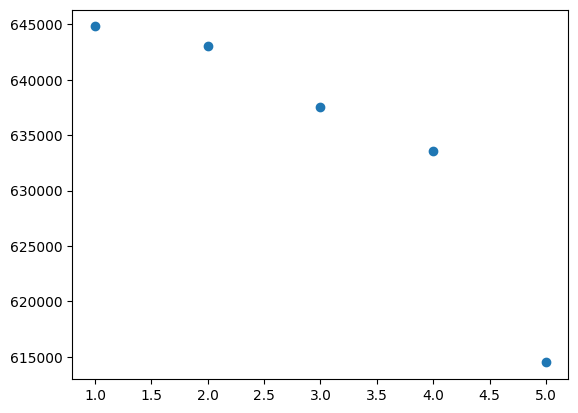

In [193]:
lojas = range(1,6)
faturamento = []

for i in lojas:
    faturamento.append(faturamento_loja_ano(i))

plt.plot(lojas, faturamento, 'o')


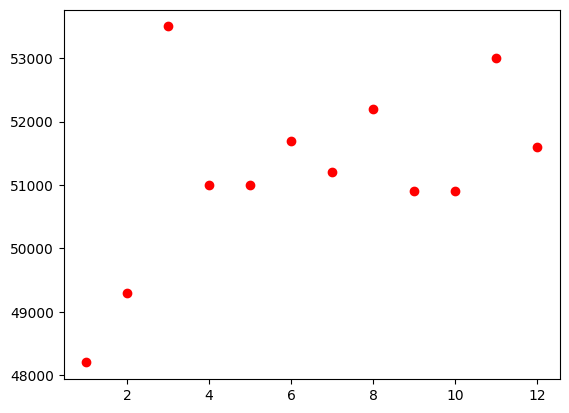

In [200]:

meses = range(1,13)
faturamento_mes = []

for i in meses:
    faturamento_mes.append(faturamento_loja_mes(5,i))

plt.plot(meses, faturamento_mes,'o', color='red')

In [ ]:
def plot_distribuicao_gastos(lojas_id):
    gastos_labels = ['faturamento']
    gastos_valores = [faturamento_loja_ano]